# 신용카드 사용자 데이터를 활용한 신용카드 연체 예측

데이터 링크 : https://www.dacon.io/competitions/official/235713/data

시각화 참고 :https://www.dacon.io/competitions/official/235713/codeshare/3119?page=1&dtype=recent

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
train =pd.read_csv('data/train.csv')
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [3]:
# 데이터 정보 확인
print(train.info())
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

<AxesSubplot:>

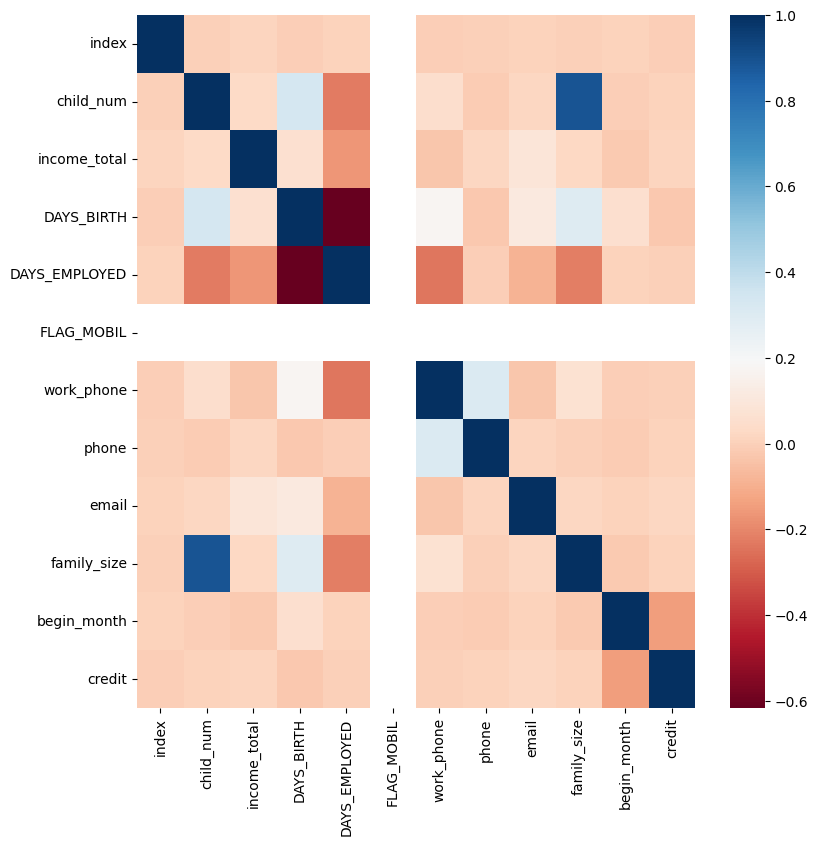

In [4]:
plt.figure(figsize=(9,9))
corr = train.corr()
sns.heatmap(corr,cmap='RdBu')

* child_num / family_size
* Days_birth / Days_employed

<AxesSubplot:xlabel='house_type', ylabel='count'>

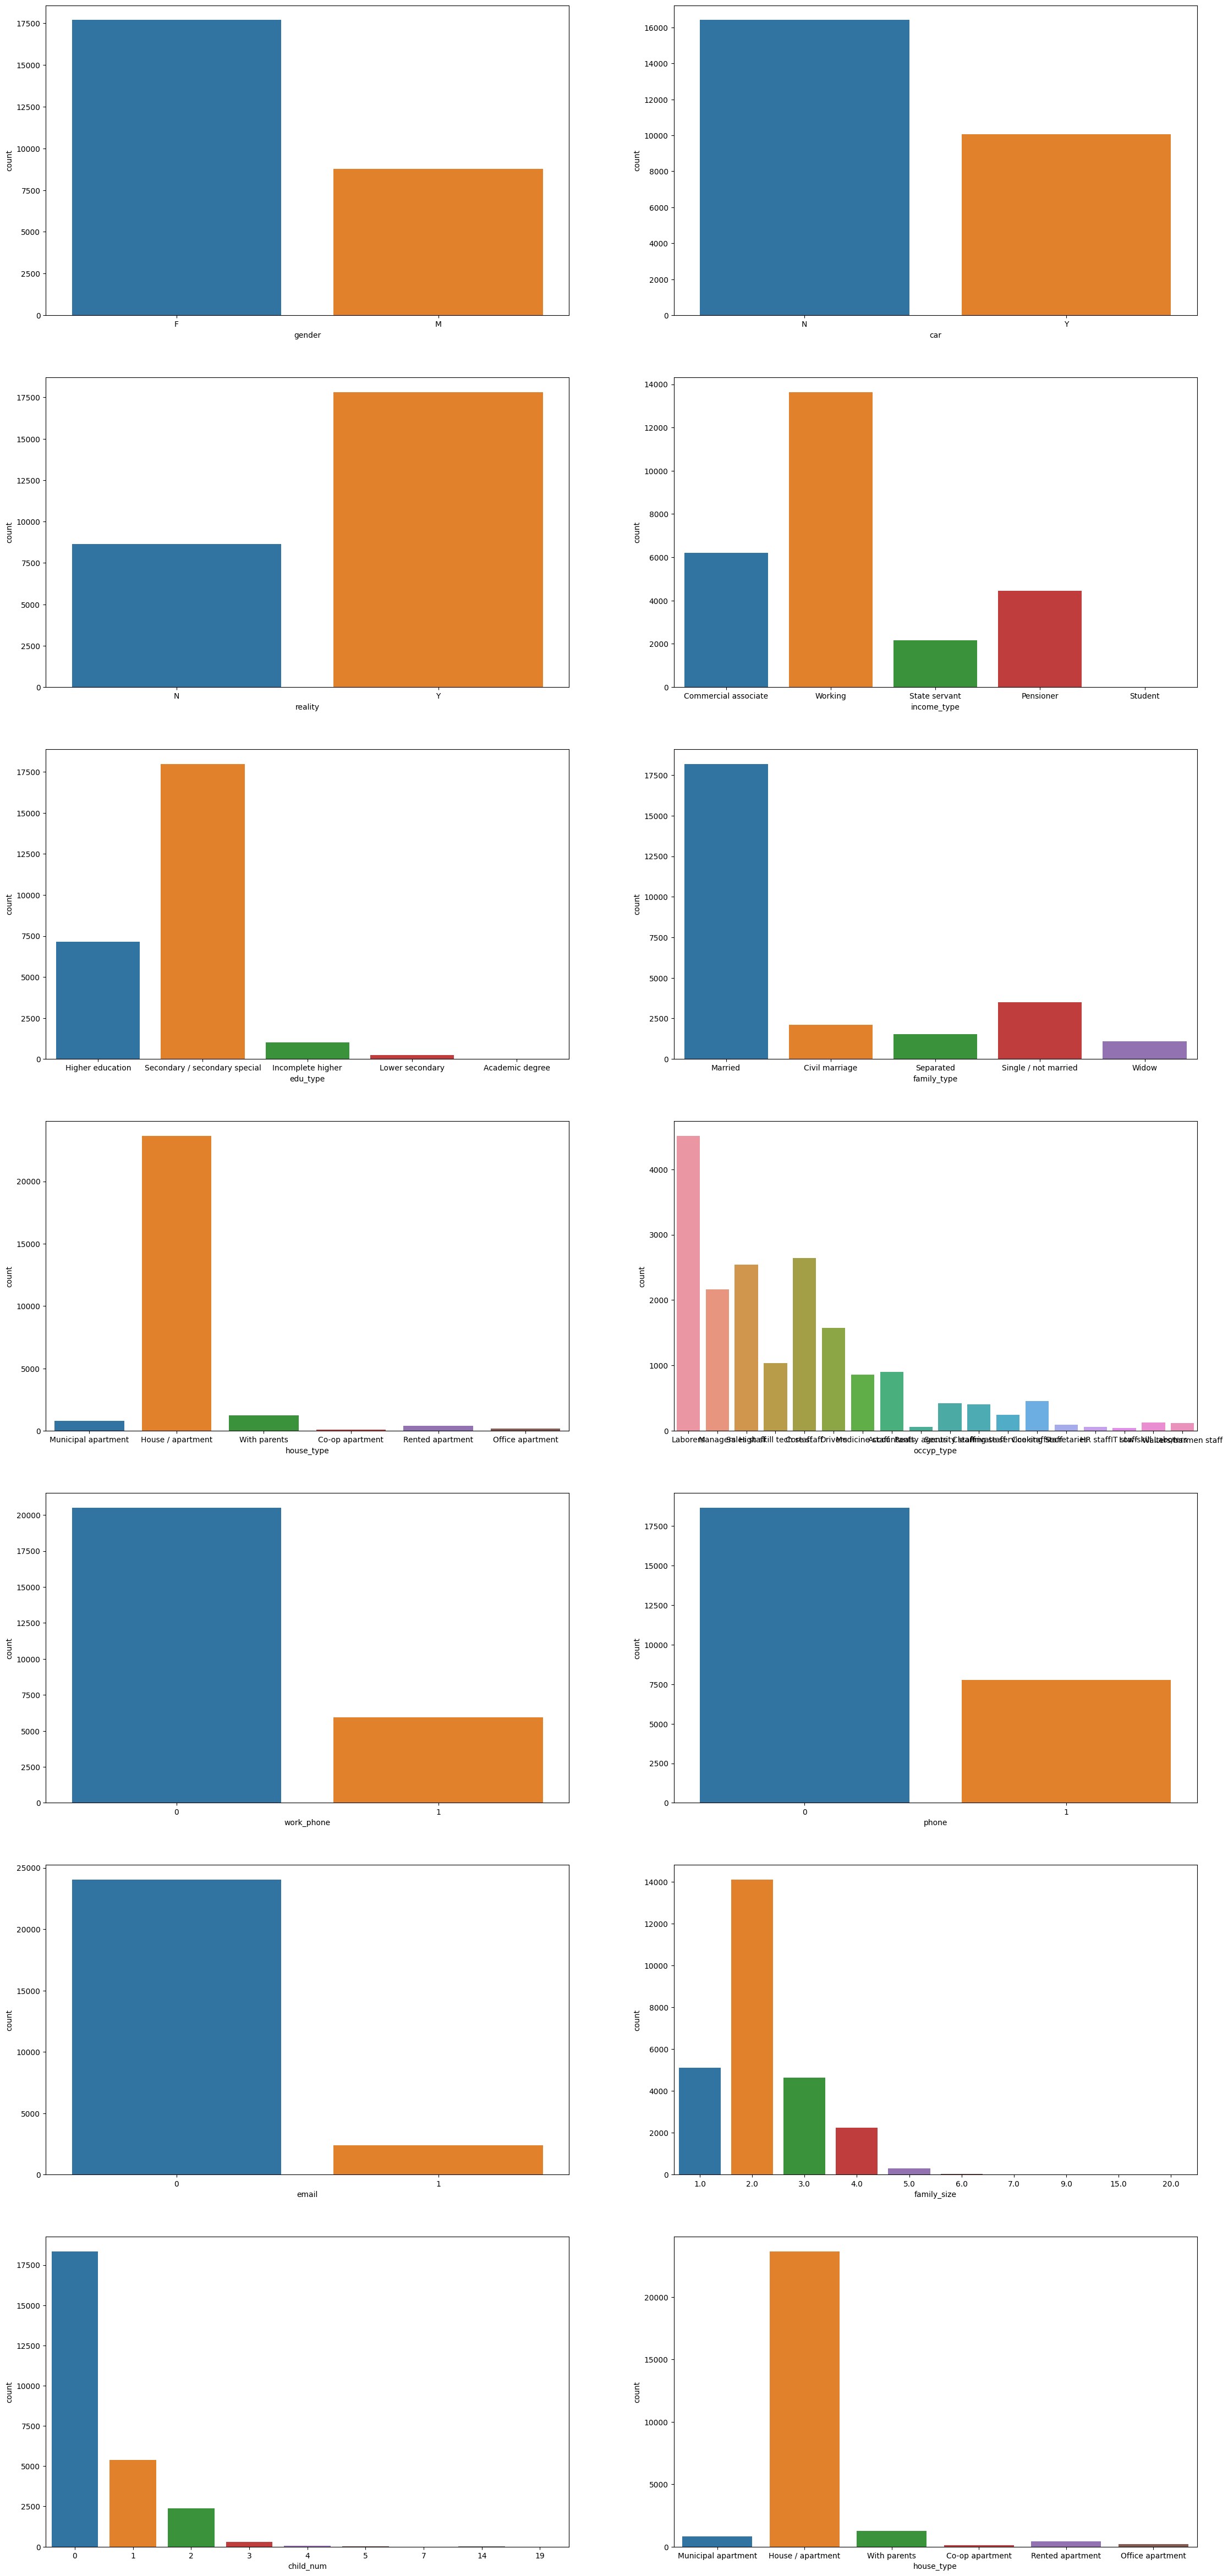

In [5]:
fig,axes = plt.subplots(nrows=7,ncols=2,figsize=(27,60))
sns.countplot(x="gender",data= train,ax=axes[0,0])
sns.countplot(x="car", data= train, ax=axes[0,1])
sns.countplot(x="reality", data= train,ax=axes[1,0])
sns.countplot(x="income_type", data= train,ax=axes[1,1])
sns.countplot(x="edu_type", data= train,ax=axes[2,0])
sns.countplot(x="family_type", data= train,ax=axes[2,1])
sns.countplot(x="house_type", data= train,ax=axes[3,0])
sns.countplot(x="occyp_type", data= train,ax=axes[3,1])
sns.countplot(x="work_phone", data= train,ax=axes[4,0])
sns.countplot(x="phone", data= train,ax=axes[4,1])
sns.countplot(x="email", data= train,ax=axes[5,0])
sns.countplot(x="family_size", data= train,ax=axes[5,1])
sns.countplot(x="child_num",data= train,ax=axes[6,0])
sns.countplot(x="house_type", data= train,ax=axes[6,1])

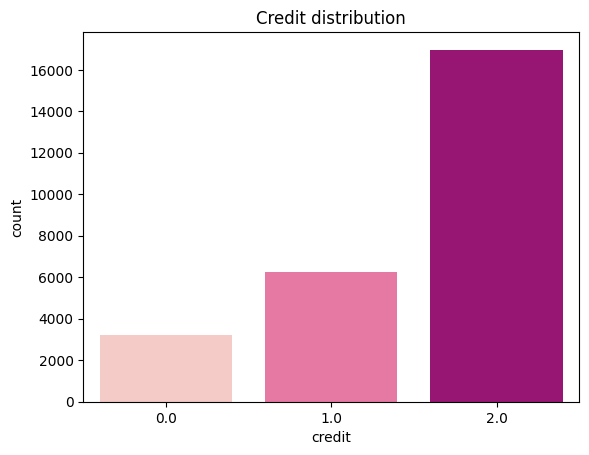

In [6]:
sns.countplot(data=train, x="credit",palette="RdPu")
plt.title('Credit distribution')
plt.show()

# 전처리

In [7]:
train.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

* 의미 없는 변수 제거 (flag_mobil 값은 모두 1로 동일)

In [8]:
train.loc[train['child_num'] >= 3,'child_num'] = 3
train.loc[train['family_size'] >= 5,'child_num'] = 5

* 이상치 제거

In [9]:
train['famchild_sum'] = train[['child_num', 'family_size']].sum(axis=1)

* 상관관계가 높아 family_size와 child_num을 합하여 한 파생변수 하나로 생각

In [10]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

* DAYS_EMPLOYED가 양수이면 무직으로 판단, 0 처리

In [11]:
feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    train[feat]=np.abs(train[feat])

* 음수 값 -> 양수 값

In [12]:
train['before_EMPLOYED'] = train['DAYS_BIRTH'] - train['DAYS_EMPLOYED']

* 상관관계가 높아 days_birth - days_employed = before_employed 파생변수로 하나로 생각

In [13]:
ocp = train[train['occyp_type'].isnull()]
ocp[ocp['DAYS_EMPLOYED'] == 0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,famchild_sum,before_EMPLOYED
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22922,0,0,1,0,NaN,1.0,41.0,2.0,1.0,22922
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23113,0,0,0,0,NaN,2.0,37.0,2.0,2.0,23113
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,21253,0,0,1,0,NaN,2.0,7.0,2.0,2.0,21253
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22361,0,0,1,0,NaN,1.0,5.0,2.0,1.0,22361
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21100,0,0,1,0,NaN,1.0,24.0,2.0,1.0,21100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21151,0,0,0,1,NaN,1.0,60.0,1.0,1.0,21151
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,22314,0,0,1,0,NaN,2.0,17.0,1.0,2.0,22314
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,19238,0,0,0,0,NaN,2.0,57.0,2.0,2.0,19238
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,24129,0,0,0,0,NaN,1.0,43.0,2.0,1.0,24129


In [14]:
ocp['occyp_type']=['inoccupation' if s==0 else 'NaN' for s in ocp['DAYS_EMPLOYED']]
ocp=ocp[ocp['occyp_type']=='inoccupation']

/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_70121/820427675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocp['occyp_type']=['inoccupation' if s==0 else 'NaN' for s in ocp['DAYS_EMPLOYED']]


In [15]:
train = train.dropna(axis=0)
train =pd.concat([train, ocp])
ocp['occyp_type'].value_counts()

inoccupation    4438
Name: occyp_type, dtype: int64

In [16]:
train['occyp_type'].value_counts()

Laborers                 4512
inoccupation             4438
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

* occyp_type에서 days_employed에서 무직이라고 판단한 데이터를 무직이라는 카테고리 만들고 할당하여 결측값 채우고 나머지 결측값 데이터는 오류라 판단하여 삭제

In [17]:
train.drop(['child_num', 'family_size'], axis=1, inplace=True)
train.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)

In [18]:
train.isnull().sum()

gender             0
car                0
reality            0
income_total       0
income_type        0
edu_type           0
family_type        0
house_type         0
work_phone         0
phone              0
email              0
occyp_type         0
begin_month        0
credit             0
famchild_sum       0
before_EMPLOYED    0
dtype: int64

In [19]:
train

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,email,occyp_type,begin_month,credit,famchild_sum,before_EMPLOYED
1,F,N,Y,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,Laborers,5.0,1.0,4.0,9840
2,M,Y,Y,450000.0,Working,Higher education,Married,House / apartment,0,1,0,Managers,22.0,2.0,2.0,14653
3,F,N,Y,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,1,0,Sales staff,37.0,0.0,2.0,12996
4,F,Y,Y,157500.0,State servant,Higher education,Married,House / apartment,0,0,0,Managers,26.0,2.0,2.0,12932
5,F,N,Y,270000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,1,High skill tech staff,18.0,1.0,6.0,8417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0,0,1,inoccupation,60.0,1.0,1.0,21151
26432,F,Y,Y,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,1,0,inoccupation,17.0,1.0,2.0,22314
26439,F,N,Y,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,0,0,0,inoccupation,57.0,2.0,2.0,19238
26441,F,N,Y,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,0,0,0,inoccupation,43.0,2.0,1.0,24129


# 시각화

<AxesSubplot:>

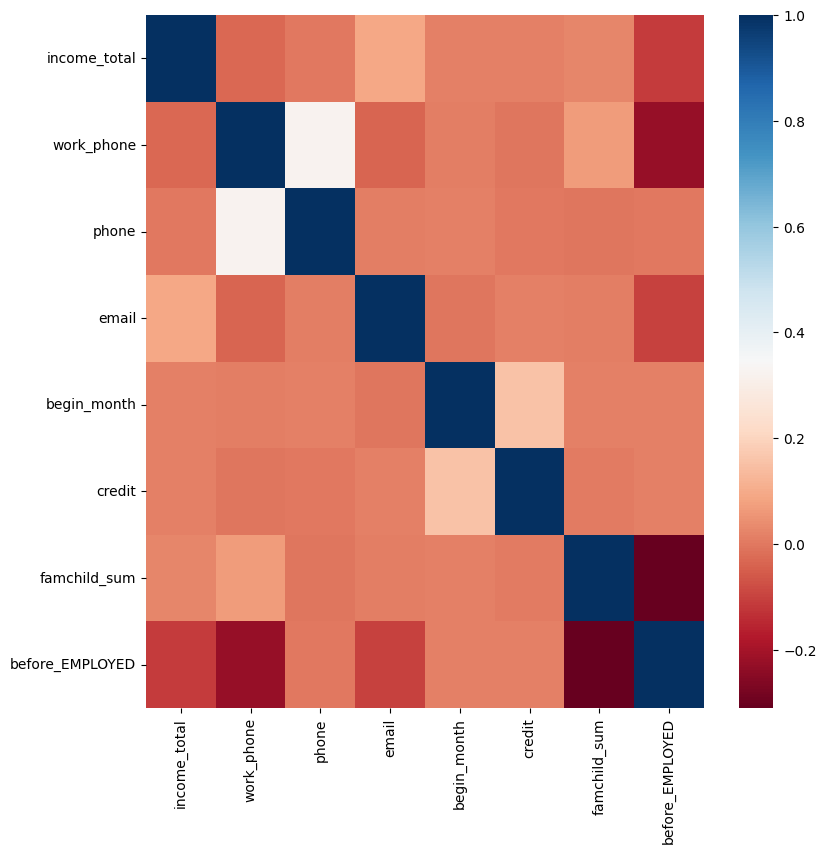

In [20]:
plt.figure(figsize=(9,9))
corr = train.corr()
sns.heatmap(corr,cmap='RdBu')

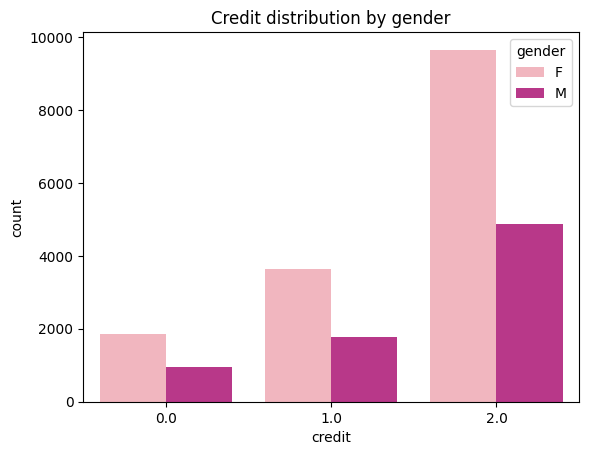

In [21]:
sns.countplot(data=train, x="credit",hue='gender',palette="RdPu")
plt.title('Credit distribution by gender')
plt.show()

# 모델링

In [22]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()
numerical_feats.remove('credit')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  8


In [23]:
from category_encoders.ordinal import OrdinalEncoder
encoder = OrdinalEncoder(categorical_feats)
train[categorical_feats] = encoder.fit_transform(train[categorical_feats], train['credit'])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[numerical_feats] = scaler.fit_transform(train[numerical_feats])

In [25]:
target = train['credit']
data = train.drop(['credit'],axis = 1, inplace=False)

In [26]:
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=156)

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [28]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_preds)))

accuracy:0.6965


In [38]:
rf = RandomForestClassifier(n_estimators=3000,
                            max_depth= 16, 
                            random_state = 42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [39]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, rf_preds)))

accuracy:0.7058


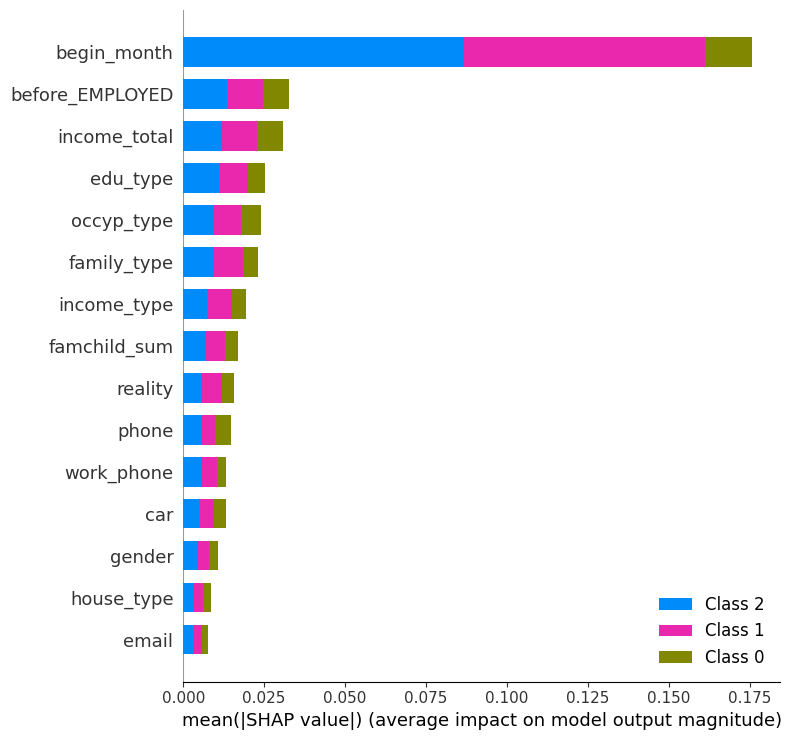

In [40]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)

## LightGBM

In [219]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
lgb_preds = lgb.predict(X_test)

In [220]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lgb_preds)))

accuracy:0.7004


In [217]:
lgb1 = LGBMClassifier(num_leaves = 2,
                     max_depth = 10,
                     learning_rate = 0.07,
                     random_state = 42)
lgb1.fit(X_train, y_train)
lgb_preds1=lgb1.predict(X_test)

In [218]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, lgb_preds1)))

accuracy:0.6926


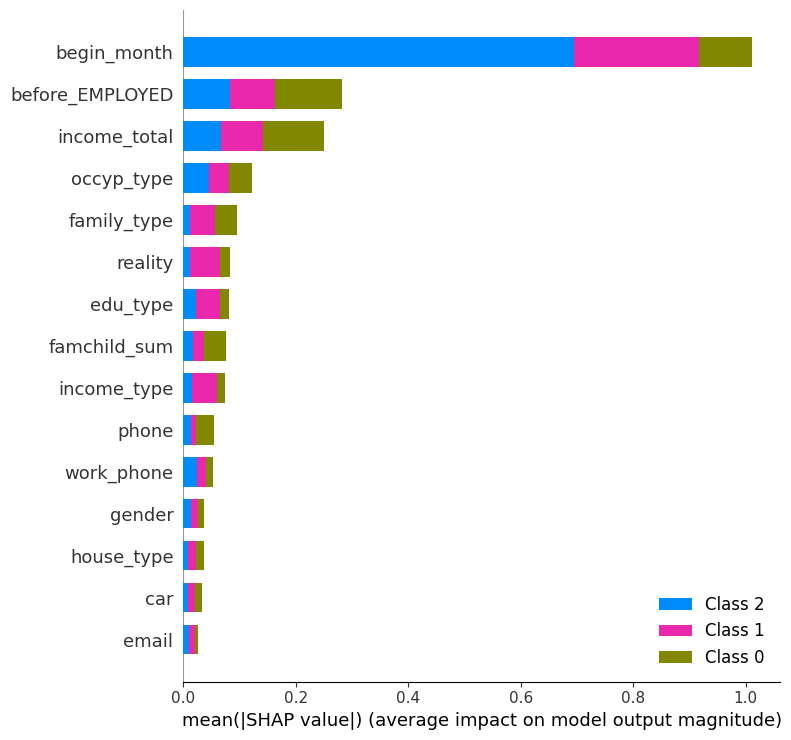

In [221]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)

## XGBoost

In [240]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [241]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, xgb_preds)))

accuracy:0.7031


In [238]:
xgb1 = XGBClassifier(n_estimators = 3000,
                    learning_rate = 0.035, 
                    max_depth = 37,
                    random_state = 42)
xgb1.fit(X_train, y_train)
xgb_preds1 = xgb1.predict(X_test)

In [239]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, xgb_preds1)))

accuracy:0.6885


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


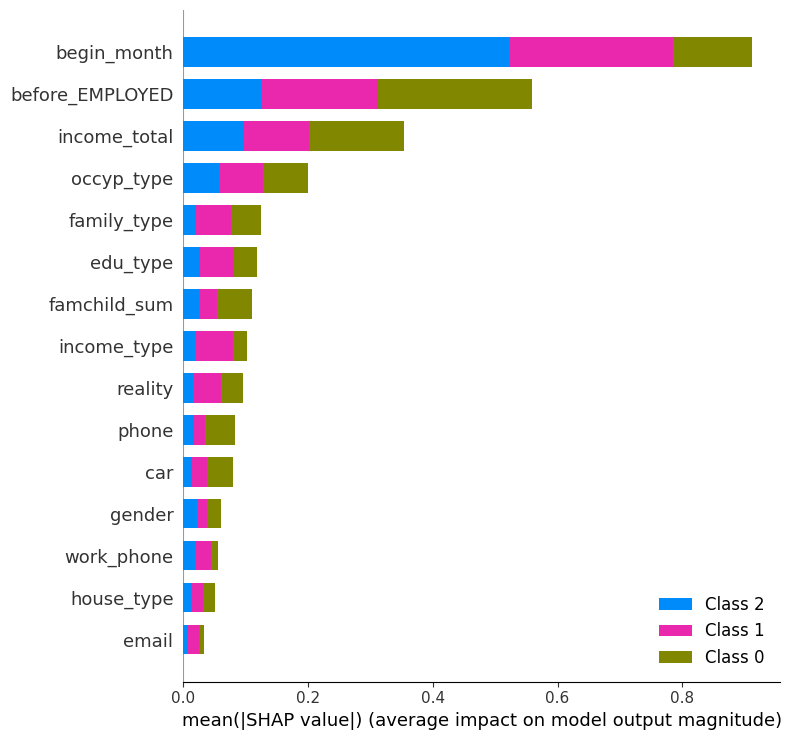

In [242]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
fig = shap.summary_plot(shap_values, X_test)

In [ ]:
from xgboost import plot_importance
plot_importance(xgb, max_num_features = 15)
plt.show()